## Import Necessary Library Files 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Create Synthetic Dataset

In [4]:
np.random.seed(42)
n_samples = 500

data = pd.DataFrame({
    "total_customers": np.random.randint(80, 300, n_samples),
    "food_prepared_kg": np.random.uniform(40, 120, n_samples),
    "menu_variety": np.random.randint(5, 20, n_samples),
    "avg_item_price": np.random.uniform(40, 120, n_samples),
    "previous_day_waste_kg": np.random.uniform(2, 25, n_samples),
    "temperature_c": np.random.uniform(20, 40, n_samples),
    "special_event": np.random.choice([0, 1], n_samples),
    "day_of_week": np.random.randint(0, 7, n_samples)
})

# Target variable
data["waste_cost_inr"] = (
    15 * data["food_prepared_kg"]
    + 10 * data["menu_variety"]
    + 8 * data["previous_day_waste_kg"]
    - 5 * data["total_customers"]
    + 12 * data["special_event"]
    + np.random.normal(0, 50, n_samples)
)

data.head()

,total_customers,food_prepared_kg,menu_variety,avg_item_price,previous_day_waste_kg,temperature_c,special_event,day_of_week,waste_cost_inr
0,182,61.723433,16,86.460577,19.708728,25.811751,1,3,401.738992
1,259,117.220146,8,61.734958,14.802652,35.739403,1,6,657.019554
2,172,76.581213,8,71.862991,7.879835,22.238719,1,5,471.987170
3,94,107.361846,9,47.335947,8.947392,27.119467,1,0,1263.023605
4,186,55.550403,12,66.909637,18.835036,39.561236,1,2,184.758718


In [6]:
data.shape

(500, 9)

## Understand the Data

In [7]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_customers        500 non-null    int32  
 1   food_prepared_kg       500 non-null    float64
 2   menu_variety           500 non-null    int32  
 3   avg_item_price         500 non-null    float64
 4   previous_day_waste_kg  500 non-null    float64
 5   temperature_c          500 non-null    float64
 6   special_event          500 non-null    int64  
 7   day_of_week            500 non-null    int32  
 8   waste_cost_inr         500 non-null    float64
dtypes: float64(5), int32(3), int64(1)
memory usage: 29.4 KB


In [8]:
data.dtypes

total_customers            int32
food_prepared_kg         float64
menu_variety               int32
avg_item_price           float64
previous_day_waste_kg    float64
temperature_c            float64
special_event              int64
day_of_week                int32
waste_cost_inr           float64
dtype: object

In [9]:
data.describe()


,total_customers,food_prepared_kg,menu_variety,avg_item_price,previous_day_waste_kg,temperature_c,special_event,day_of_week,waste_cost_inr
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,192.810000,80.543890,11.690000,80.643281,13.162863,29.942645,0.516000,2.854000,473.961059
std,63.624382,22.507839,4.287034,23.120798,6.561508,5.889457,0.500244,2.003175,472.495255
min,80.000000,40.207602,5.000000,40.082358,2.007648,20.003768,0.000000,0.000000,-841.701702
25%,133.000000,60.867508,8.000000,60.209501,7.258526,24.867011,0.000000,1.000000,139.696975
50%,195.000000,82.328406,11.500000,82.061228,13.111719,30.092047,1.000000,3.000000,465.202931
75%,246.250000,98.964148,15.000000,100.539334,18.926258,35.084721,1.000000,5.000000,798.382731
max,299.000000,119.815409,19.000000,119.706862,24.896051,39.994276,1.000000,6.000000,1584.503632


## Check for Missing Values

In [12]:
data.isnull().sum()

total_customers          0
food_prepared_kg         0
menu_variety             0
avg_item_price           0
previous_day_waste_kg    0
temperature_c            0
special_event            0
day_of_week              0
waste_cost_inr           0
dtype: int64

## Correlation Heatmap

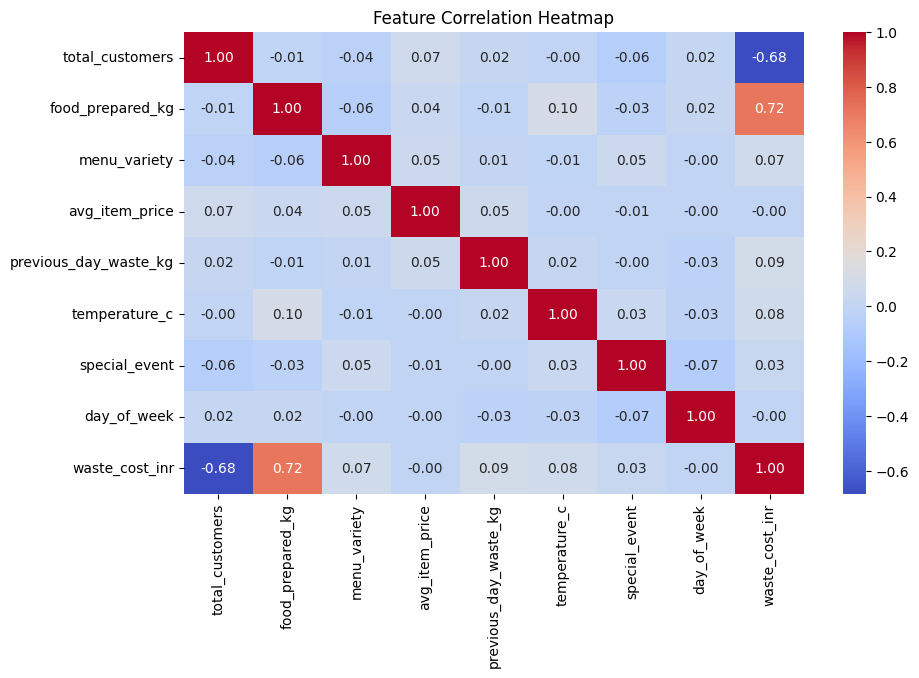

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## Train–Test Split

In [14]:
# Features = all columns except last
X = data.iloc[:, :-1]

# Target = last column
y = data.iloc[:, -1]

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Feature Scaling (Standardization)

In [20]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


## Cell 8 — Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
Regression = LinearRegression()

In [27]:
Regression.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [30]:
y_pred = Regression.predict(X_test)

In [33]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [34]:
print("Linear Regression Results")
print("R2  :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression Results
R2  : 0.9892996194992736
MAE : 39.12424148095032
RMSE: 49.83240249501515


## Ridge Regression 

In [38]:
from sklearn.linear_model import Ridge

In [39]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

print("Ridge Regression Results")
print("R2  :", r2_score(y_test, y_pred_ridge))
print("MAE :", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge Regression Results
R2  : 0.9892990120841662
MAE : 39.061731601345734
RMSE: 49.833816861755054


## Lasso Regression

In [40]:
from sklearn.linear_model import  Lasso

In [41]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

print("Lasso Regression Results")
print("R2  :", r2_score(y_test, y_pred_lasso))
print("MAE :", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Lasso Regression Results
R2  : 0.9892906960007946
MAE : 39.11556489948996
RMSE: 49.8531768355753


## Coefficient Comparison

In [44]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear": Regression.coef_,
    "Ridge": ridge_model.coef_,
    "Lasso": lasso_model.coef_
})

coef_df


,Feature,Linear,Ridge,Lasso
0,total_customers,-316.281312,-315.476842,-316.171682
1,food_prepared_kg,343.932877,343.051173,343.834759
2,menu_variety,40.736891,40.609341,40.638251
3,avg_item_price,2.317714,2.281000,2.218235
4,previous_day_waste_kg,49.649166,49.498306,49.555918
5,temperature_c,0.368448,0.460253,0.292158
6,special_event,2.085029,2.090919,2.001025
7,day_of_week,-1.612754,-1.580960,-1.523894


## Predict for New Data Point

In [45]:
# New unseen canteen data (example)
new_data = pd.DataFrame([[
    180,   # total_customers
    85,    # food_prepared_kg
    12,    # menu_variety
    75,    # avg_item_price
    10,    # previous_day_waste_kg
    32,    # temperature_c
    1,     # special_event
    4      # day_of_week
]], columns=X.columns)


In [46]:
new_data_scaled = scaler.transform(new_data)


In [49]:
print("Predicted Waste Cost (₹)")
print("Regression :", Regression.predict(new_data_scaled)[0])
print("Ridge  :", ridge_model.predict(new_data_scaled)[0])
print("Lasso  :", lasso_model.predict(new_data_scaled)[0])


Predicted Waste Cost (₹)
Regression : 581.3158464681583
Ridge  : 581.1301347022223
Lasso  : 581.286523873047


In [50]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

ridge_params = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

ridge_grid = GridSearchCV(
    ridge,
    ridge_params,
    cv=5,
    scoring="r2"
)

ridge_grid.fit(X_train_scaled, y_train)

print("Best Ridge Alpha:", ridge_grid.best_params_)
print("Best Ridge R2   :", ridge_grid.best_score_)


Best Ridge Alpha: {'alpha': 1}
Best Ridge R2   : 0.9880882581104334


In [51]:
lasso = Lasso(max_iter=5000)

lasso_params = {
    "alpha": [0.001, 0.01, 0.1, 1]
}

lasso_grid = GridSearchCV(
    lasso,
    lasso_params,
    cv=5,
    scoring="r2"
)

lasso_grid.fit(X_train_scaled, y_train)

print("Best Lasso Alpha:", lasso_grid.best_params_)
print("Best Lasso R2   :", lasso_grid.best_score_)


Best Lasso Alpha: {'alpha': 1}
Best Lasso R2   : 0.9881265983849934


In [52]:
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

y_pred_best_ridge = best_ridge.predict(X_test_scaled)
y_pred_best_lasso = best_lasso.predict(X_test_scaled)

print("Optimized Ridge R2 :", r2_score(y_test, y_pred_best_ridge))
print("Optimized Lasso R2 :", r2_score(y_test, y_pred_best_lasso))


Optimized Ridge R2 : 0.9892990120841662
Optimized Lasso R2 : 0.9891939704094233


## Actual vs Predicted Plot

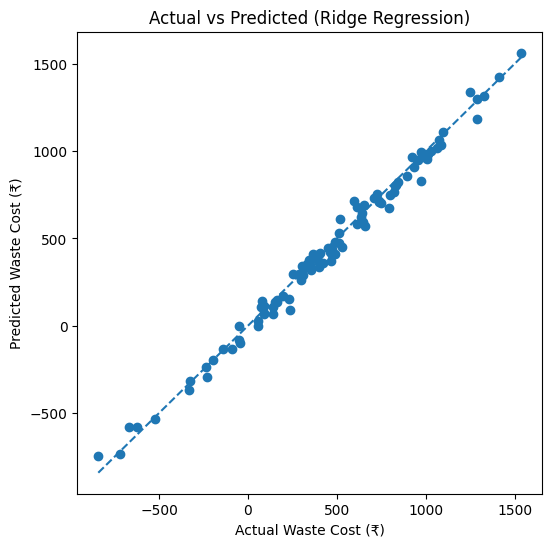

In [53]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best_ridge)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual Waste Cost (₹)")
plt.ylabel("Predicted Waste Cost (₹)")
plt.title("Actual vs Predicted (Ridge Regression)")
plt.show()


## Residual Analysis

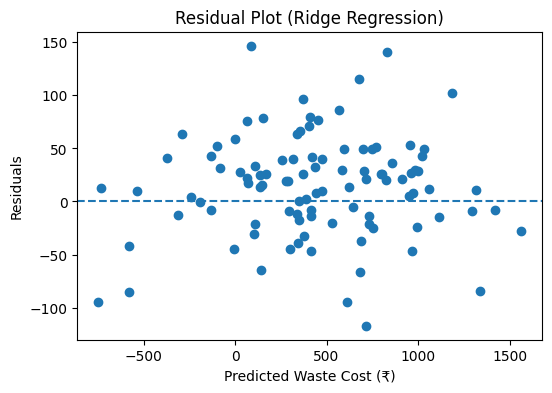

In [54]:
residuals = y_test - y_pred_best_ridge

plt.figure(figsize=(6, 4))
plt.scatter(y_pred_best_ridge, residuals)
plt.axhline(y=0, linestyle="--")
plt.xlabel("Predicted Waste Cost (₹)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Ridge Regression)")
plt.show()


## Final Conclusions

- Linear Regression provided a strong baseline but was sensitive to correlated features.
- Ridge Regression improved stability by shrinking coefficients and handling multicollinearity.
- Lasso Regression performed feature selection by reducing less important feature coefficients to zero.
- Regularization helped improve generalization and model interpretability.

## Key Business Insights

- Over-preparation of food has the highest impact on waste cost.
- Menu variety significantly increases food waste when not demand-driven.
- Previous day waste is a strong indicator of future waste.
- Special events tend to increase waste cost and should be planned carefully.

## Recommendation

Use Ridge Regression with tuned alpha for daily food preparation planning to minimize waste and cost.
